Expected Value E[X]: 5.00586
Variance Var[X]: 2.4977856604


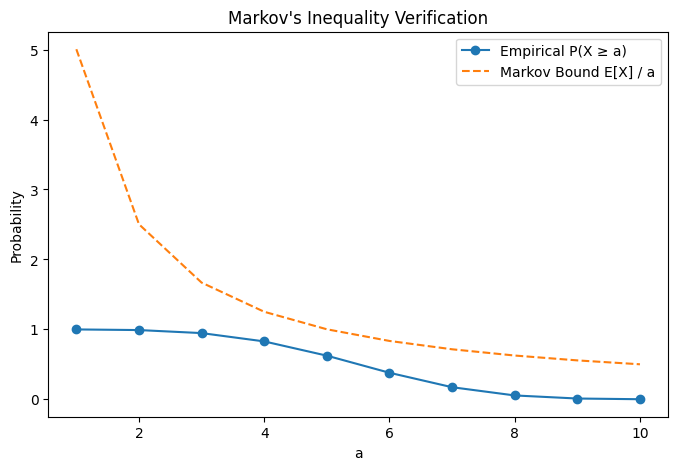

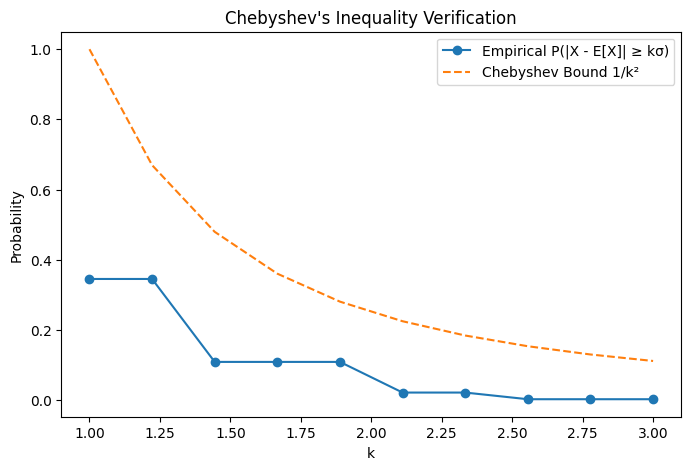

In [ ]:
# markov and chebyshev
import numpy as np
import matplotlib.pyplot as plt

# params
trials = 100000
tosses = 10

# coin tosses
coin_tosses = np.random.randint(0, 2, size=(trials, tosses))

# number of heads per trial
X = np.sum(coin_tosses, axis=1)

E_X = np.mean(X)
Var_X = np.var(X)


print(f"Expected Value E[X]: {E_X}")
print(f"Variance Var[X]: {Var_X}")

# verify markov: P(X >= a) <= E[X]/a
# gives an upper bound on the probability that X takes a value at least as large as a

a_values = np.arange(1, tosses + 1)
markov_bounds = E_X / a_values # theoretical bound (E[X] / a)
probs = np.array([np.mean(X >= a) for a in a_values]) # the actual probability from simulation

plt.figure(figsize=(8, 5))
plt.plot(a_values, probs, label="Empirical P(X ≥ a)", marker='o')
plt.plot(a_values, markov_bounds, label="Markov Bound E[X] / a", linestyle="--")
plt.xlabel("a")
plt.ylabel("Probability")
plt.legend()
plt.title("Markov's Inequality Verification")
plt.show()

# verify chebyshev

k_values = np.linspace(1, 3, 10)  # Different k values
sigma_X = np.sqrt(Var_X)
chebyshev_bounds = 1 / (k_values ** 2)
empirical_chebyshev = np.array([np.mean(np.abs(X - E_X) >= k * sigma_X) for k in k_values])

plt.figure(figsize=(8, 5))
plt.plot(k_values, empirical_chebyshev, label="Empirical P(|X - E[X]| ≥ kσ)", marker='o')
plt.plot(k_values, chebyshev_bounds, label="Chebyshev Bound 1/k²", linestyle="--")
plt.xlabel("k")
plt.ylabel("Probability")
plt.legend()
plt.title("Chebyshev's Inequality Verification")
plt.show()



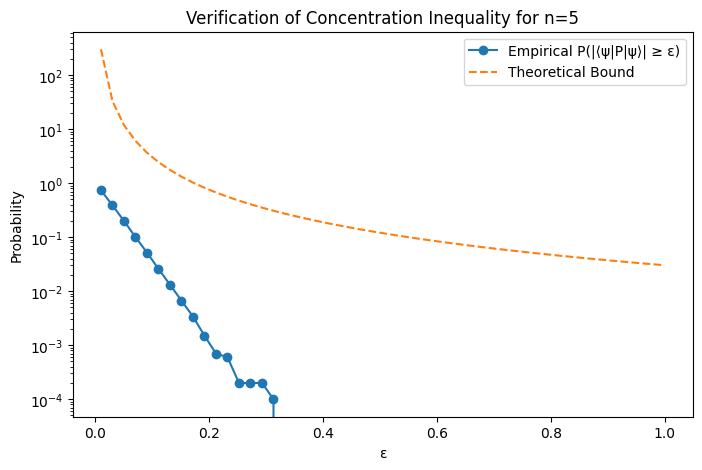

In [3]:
# Haar-random worked example
    # P(|<psi|P|psi>| >= epsilon) <= 1/((2^n + 1)epsilon^2)
        # for |psi> haar random quantum state
        # P: observable (Pauli matrix)
def haar_random_state(n):
    """Generates a Haar-random quantum state of dimension 2^n."""
    dim = 2**n
    z = np.random.randn(dim) + 1j * np.random.randn(dim)  # Complex Gaussian
    return z / np.linalg.norm(z)  # Normalize

# Parameters
n = 5  # Number of qubits
d = 2**n  # Hilbert space dimension
num_samples = 10000  # Number of Haar-random states

# Observable P (Pauli Z on first qubit)
P = np.zeros((d, d))
P[0, 0] = 1  # |0⟩⟨0|
P[1, 1] = -1  # |1⟩⟨1|

# Compute expectation values squared
expectation_values_sq = np.array([np.vdot(psi, P @ psi)**2 for psi in [haar_random_state(n) for _ in range(num_samples)]])

# Define epsilon values
epsilons = np.linspace(0.01, 1, 50)

# Compute empirical probabilities P(|⟨ψ|P|ψ⟩| ≥ ε)
empirical_probs = np.array([np.mean(expectation_values_sq >= eps**2) for eps in epsilons])

# Compute theoretical bound 1 / ((2^n + 1) ε²)
theoretical_bound = 1 / ((2**n + 1) * epsilons**2)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(epsilons, empirical_probs, label="Empirical P(|⟨ψ|P|ψ⟩| ≥ ε)", marker='o')
plt.plot(epsilons, theoretical_bound, label="Theoretical Bound", linestyle="--")
plt.xlabel("ε")
plt.ylabel("Probability")
plt.yscale("log")
plt.legend()
plt.title(f"Verification of Concentration Inequality for n={n}")
plt.show()
